        sseqid
0  NM_020153.4
1   AC231769.2
       sseqid
0  BC022856.1
1  AP023477.1
2  AP023477.1
NM_020153.4    1
AC231769.2     1
Name: sseqid, dtype: int64
AP023477.1    2
BC022856.1    1
Name: sseqid, dtype: int64
120
120


/tmp/ipykernel_32268/314568613.py:162: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count = sseq_count_series3.append(ser)


                                              sseqid  count
0  Homo sapiens intraflagellar transport 46 (IFT4...      1
1  Homo sapiens FOSMID clone ABC13-910122L2 from ...      1
2                                              Other      0
                                              sseqid  count
0  Homo sapiens DNA, chromosome 17, nearly comple...      2
1  Homo sapiens chromosome 11 open reading frame ...      1
2                                              Other      0


/tmp/ipykernel_32268/314568613.py:200: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count2 = sseq_count_series6.append(ser2)


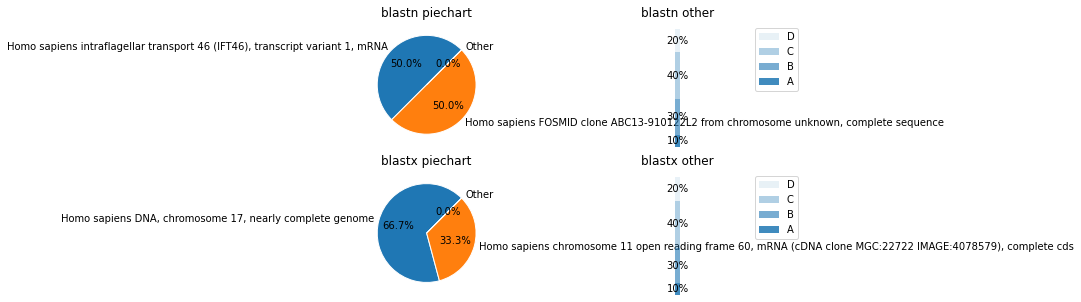

<Figure size 432x288 with 0 Axes>

In [22]:
#select intepreter and change environment to anaconda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import xmltodict
from xml.dom import minidom
import time


#handles command line input parameter
import sys
import os

blast_tsv_file = 'ATPX_unmappedblast_downsampled_blastn.tsv'
blast_tsv_file2 = 'ATPX_unmappedblast_downsampled_blastn2.tsv'
piePath = 'ATPX_n.png'
piePathSample = os.path.splitext(piePath)[0]
piePathSample2 = os.path.split(piePathSample)
pieName = piePathSample2[1]

#ncbi query functions
def esearch(term, db='gds'):
    """
    Queries NCBI using the esearch utility. GEO ('gds') database is used as default for search term.
    """
    url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db={db}&term={term}&retmax=5000&usehistory=y'
    response = urllib.request.urlopen(url)
    return response.read()


def get_esummary(esearch_string, db='gds'):
    """
    Parses a http response in XML format to obtain the webenv and querykey tokens.
    Uses NCBI eutils to transform these tokens into web summaries of GEO (db='gds') datasets.
    """
    xmldoc = minidom.parseString(esearch_string)
    try:
        webenv = xmldoc.getElementsByTagName('WebEnv')[0].firstChild.data
        querykey = xmldoc.getElementsByTagName('QueryKey')[0].firstChild.data
        host = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi'
        params = f'?db={db}&version=2.0&query_key={querykey}&WebEnv={webenv}'
        url = host + params
        response = urllib.request.urlopen(url)
        return response.read()
    except IndexError as e:
        print(f"Unparsable publication string ({e}, search={esearch_string}")
        return ""

#matplotlib to build the piechart
# fig, ax = plt.subplots()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 5))
ax1.set_title('blastn piechart')
ax2.set_title('blastn other')
ax3.set_title('blastx piechart')
ax4.set_title('blastx other')
fig.subplots_adjust(wspace=0)





# Read the blast n file
df = pd.read_csv(blast_tsv_file, header=None, sep='\t')
num_seqs = df.size
df.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df2 = df[['qseqid','sseqid','evalue']].copy()

# Read the blast x file
df4 = pd.read_csv(blast_tsv_file2, header=None, sep='\t')
num_seqs2 = df4.size
df4.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']





### still need to reorganize the code for each different file below.


#blast n output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list1 = []
qseqid_list1 = []
for idx in df.index:
        if df['qseqid'][idx] not in qseqid_list1:
                qseqid_list1.append(df['qseqid'][idx])
                sseqid_list1.append(df['sseqid'][idx])
sseqid_np1 = np.array(sseqid_list1)

#blast x output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list2 = []
qseqid_list2 = []
for idx in df4.index:
        if df4['qseqid'][idx] not in qseqid_list2:
                qseqid_list2.append(df4['qseqid'][idx])
                sseqid_list2.append(df4['sseqid'][idx])
sseqid_np2 = np.array(sseqid_list2)

df3 = pd.DataFrame(data = sseqid_np1, columns=['sseqid'])
print(df3)

df5 = pd.DataFrame(data = sseqid_np2, columns=['sseqid'])
print(df5)

sseq_count_series1 = df3['sseqid'].value_counts()
print(sseq_count_series1)

sseq_count_series4 = df5['sseqid'].value_counts()
print(sseq_count_series4)

#loop through series to determine which elements to remove and add into "other" column
to_remove1 = []
other_count1 = 0
to_remove2 = []
other_count2 = 0

print(num_seqs)
print(num_seqs2)

#taking 1% of number of sequences for blast n
for index,values in sseq_count_series1.iteritems():
        if(values < (0.001)*(num_seqs)):
                to_remove1.append(index)
                other_count1 += values

#taking 1% of number of sequences for blast x
for index,values in sseq_count_series4.iteritems():
        if(values < (0.001)*(num_seqs2)):
                to_remove2.append(index)
                other_count2 += values              
                

#remove these elements from series
sseq_count_series2 = sseq_count_series1.drop(to_remove1)
sseq_count_series5 = sseq_count_series4.drop(to_remove2)

sseq_name_list = []
sseqid = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series2.iteritems():
        sseqid.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements = {sseqid:sseq_name_list for sseqid, sseq_name_list in zip(sseqid, sseq_name_list)}
sseq_count_series3 = sseq_count_series2.rename(replacements)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d = {'Other':other_count}
ser = pd.Series(data=d, index=['Other'])

#append new element
sseq_count = sseq_count_series3.append(ser)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df = pd.DataFrame({'sseqid':sseq_count.index, 'count':sseq_count.values})
print(sseq_count_df)

count = sseq_count_df['count']
sseq = sseq_count_df['sseqid']






sseq_name_list2 = []
sseqid2 = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series5.iteritems():
        sseqid2.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list2.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements2 = {sseqid2:sseq_name_list2 for sseqid2, sseq_name_list2 in zip(sseqid2, sseq_name_list2)}
sseq_count_series6 = sseq_count_series5.rename(replacements2)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d2 = {'Other':other_count2}
ser2 = pd.Series(data=d2, index=['Other'])

#append new element
sseq_count2 = sseq_count_series6.append(ser2)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df2 = pd.DataFrame({'sseqid':sseq_count2.index, 'count':sseq_count2.values})
print(sseq_count_df2)

count2 = sseq_count_df2['count']
sseq2 = sseq_count_df2['sseqid']










gene_ratios = [0.1, 0.3, 0.4, 0.2]
gene_labels = ['A','B','C','D']
bottom = 1
width = 0.2

wedges1, *_ = ax1.pie(count, labels = sseq, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios, gene_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# ax2.set_title('Other unmapped reads')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * 2, 2.5 * 2)









wedges2, *_ = ax3.pie(count2, labels = sseq2, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios, gene_labels)])):
    bottom -= height
    bc = ax4.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax4.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
# ax4.set_title('Other unmapped reads')
ax4.legend()
ax4.axis('off')
ax4.set_xlim(- 2.5 * 2, 2.5 * 2)











# plt.title('Blastn Unmapped Sequences Summary ' + pieName)
plt.show(block=True)
plt.savefig(piePath,format='png',bbox_inches='tight')
